<a href="https://colab.research.google.com/github/DhanashreeYevle/COPD/blob/main/copd_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten, MaxPooling1D,BatchNormalization

data = pd.read_csv('/content/drive/MyDrive/mfcc_final.csv')
print(data)
data['COPD_Level']= data['COPD_Level'].str.split('D',expand=True)[1]
y= data['COPD_Level']
X = data.iloc[:, 0:-1].values

from sklearn.preprocessing import OneHotEncoder
y_ = y.values.reshape(-1, 1)
y=y_
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

epoch=250


         mfcc_0     mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0    -455.00570  88.901130  71.920080  50.107895  29.610500  14.716070   
1    -436.70258  80.857956  65.275030  45.560665  27.584724  15.265419   
2    -457.79892  68.503914  56.581780  42.086285  29.676610  21.821167   
3    -518.52014  65.958620  54.897343  41.580578  29.960512  21.900810   
4    -445.55508  83.036250  64.634150  44.106125  29.006044  21.619766   
...         ...        ...        ...        ...        ...        ...   
2011 -485.28060  43.289467  42.176970  40.486217  38.308600  35.691520   
2012 -472.77194  41.641575  40.635334  39.174343  37.292027  34.986366   
2013 -463.22820  33.651085  33.021984  32.115578  30.962427  29.536556   
2014 -436.62534  76.881660  65.153175  49.765472  34.739063  22.916552   
2015 -434.13754  59.263890  53.596455  45.870804  37.763107  30.550217   

         mfcc_6     mfcc_7     mfcc_8     mfcc_9  ...   mfcc_31   mfcc_32  \
0      6.827194   4.965545   6.949

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
Y_train.shape

(1630, 5)

In [ ]:
X_train.shape

(1630, 40)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_test

array([[ 0.89167815, -0.69458941, -0.59971576, ...,  1.20588313,
         1.40560242,  1.3578547 ],
       [-0.09533068, -1.53305123, -1.66999467, ...,  0.2160167 ,
         0.38001991,  0.38740799],
       [ 1.18734194,  0.9797137 ,  1.07206147, ...,  0.03090107,
        -0.03846116, -0.01680331],
       ...,
       [ 0.37782344,  0.06130743,  0.18186999, ...,  0.9089371 ,
         0.83713725,  0.58704366],
       [ 0.46054196, -0.77810091, -0.96091015, ...,  1.52671349,
         1.71319391,  1.68433758],
       [ 0.32084634, -0.17442771, -0.02692762, ...,  0.28415652,
         0.50906519,  0.50655422]])

In [ ]:
#CNN
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print(X_train.shape)
model = Sequential()
model.add(Conv1D(256, 4, activation="relu", input_shape=(40,1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv1D(128, 4, activation="relu"))
model.add(Conv1D(64, 4, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))

model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(5, activation = 'softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001,amsgrad=True,use_ema=True,ema_momentum=0.5), metrics=['accuracy'])
#model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

# Train your CNN model
history=model.fit(X_train, Y_train,batch_size=16, epochs=epoch,validation_data=(X_test, Y_test))

#evaluate CNN model
model.evaluate(X_test,Y_test)

(3305, 40, 1)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 37, 256)           1280      
                                                                 
 dropout_17 (Dropout)        (None, 37, 256)           0         
                                                                 
 batch_normalization_17 (Bat  (None, 37, 256)          1024      
 chNormalization)                                                
                                                                 
 conv1d_23 (Conv1D)          (None, 34, 128)           131200    
                                                                 
 conv1d_24 (Conv1D)          (None, 31, 64)            32832     
                                                                 
 dense_32 (Dense)            (None, 31, 32)            2080      
                                       

[4.8996357917785645, 0.4826732575893402]

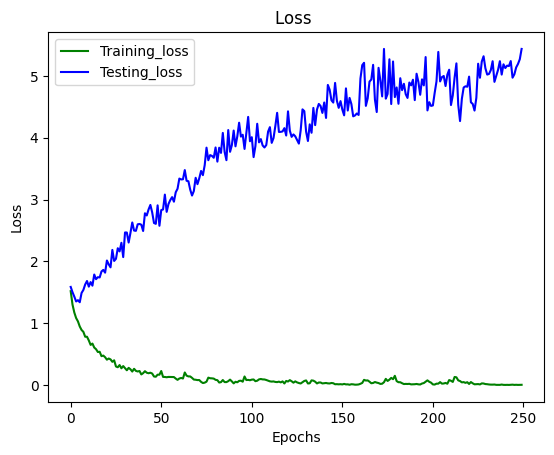

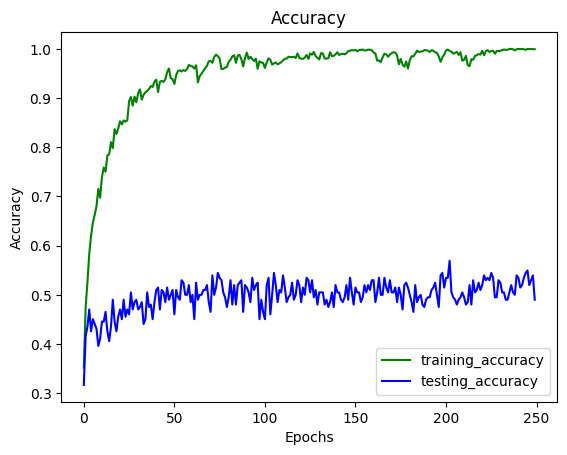

In [ ]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(0,epoch)
plt.plot(epochs, training_loss, 'g', label='Training_loss')
plt.plot(epochs,val_loss, 'b', label='Testing_loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(0,epoch)
plt.plot(epochs, train_accuracy, 'g', label='training_accuracy')
plt.plot(epochs,val_accuracy, 'b', label='testing_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
history1=model.fit(X_train, Y_train,batch_size=16, epochs=100,validation_data=(X_test, Y_test))

model.summary()

Epoch 1/100
102/102 [==============================] - 2s 6ms/step - loss: 1.6571 - accuracy: 0.3963 - val_loss: 1.3867 - val_accuracy: 0.4455
Epoch 2/100
102/102 [==============================] - 1s 5ms/step - loss: 1.3402 - accuracy: 0.4785 - val_loss: 1.3293 - val_accuracy: 0.4257
Epoch 3/100
102/102 [==============================] - 0s 5ms/step - loss: 1.2303 - accuracy: 0.5362 - val_loss: 1.3358 - val_accuracy: 0.4653
Epoch 4/100
102/102 [==============================] - 0s 5ms/step - loss: 1.1187 - accuracy: 0.5730 - val_loss: 1.3266 - val_accuracy: 0.4604
Epoch 5/100
102/102 [==============================] - 0s 5ms/step - loss: 1.0855 - accuracy: 0.5877 - val_loss: 1.3083 - val_accuracy: 0.4653
Epoch 6/100
102/102 [==============================] - 1s 5ms/step - loss: 1.0286 - accuracy: 0.6049 - val_loss: 1.3654 - val_accuracy: 0.4505
Epoch 7/100
102/102 [==============================] - 0s 5ms/step - loss: 0.9942 - accuracy: 0.6178 - val_loss: 1.2689 - val_accuracy: 0.4703

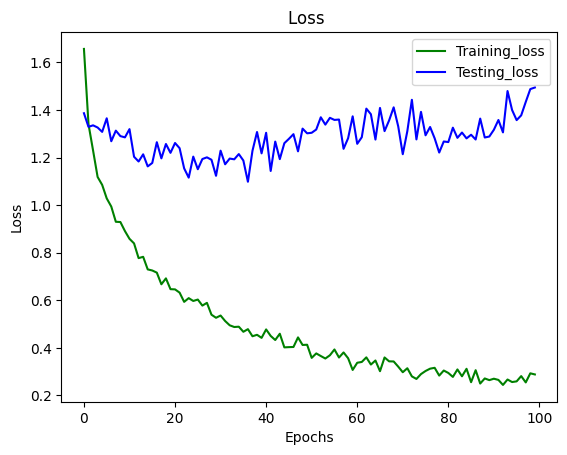

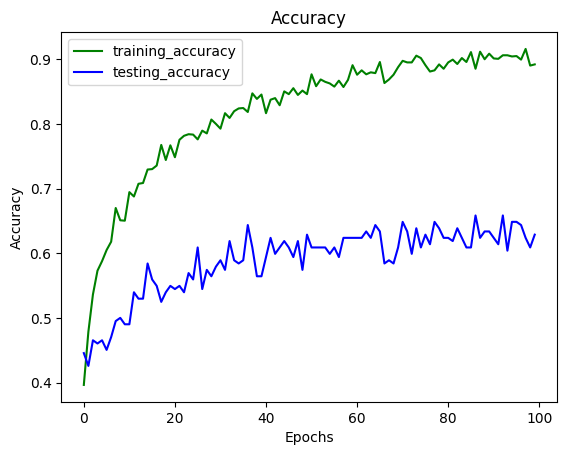

In [ ]:
import matplotlib.pyplot as plt
training_loss = history1.history['loss']
val_loss=history1.history['val_loss']
epochs = range(0,100)
plt.plot(epochs, training_loss, 'g', label='Training_loss')
plt.plot(epochs,val_loss, 'b', label='Testing_loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs, train_accuracy, 'g', label='training_accuracy')
plt.plot(epochs,val_accuracy, 'b', label='testing_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### **Best fit Save it**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
history2=model.fit(X_train, Y_train,batch_size=16, epochs=epoch,validation_data=(X_test, Y_test))

model.summary()


Epoch 1/250
203/203 [==============================] - 3s 6ms/step - loss: 1.9147 - accuracy: 0.2779 - val_loss: 1.5351 - val_accuracy: 0.3045
Epoch 2/250
203/203 [==============================] - 1s 4ms/step - loss: 1.6368 - accuracy: 0.3202 - val_loss: 1.5266 - val_accuracy: 0.3094
Epoch 3/250
203/203 [==============================] - 1s 5ms/step - loss: 1.5093 - accuracy: 0.3617 - val_loss: 1.4281 - val_accuracy: 0.3614
Epoch 4/250
203/203 [==============================] - 1s 4ms/step - loss: 1.4559 - accuracy: 0.3836 - val_loss: 1.4435 - val_accuracy: 0.3540
Epoch 5/250
203/203 [==============================] - 1s 5ms/step - loss: 1.3982 - accuracy: 0.4124 - val_loss: 1.4707 - val_accuracy: 0.3713
Epoch 6/250
203/203 [==============================] - 1s 6ms/step - loss: 1.3801 - accuracy: 0.4148 - val_loss: 1.4546 - val_accuracy: 0.3985
Epoch 7/250
203/203 [==============================] - 1s 7ms/step - loss: 1.3356 - accuracy: 0.4485 - val_loss: 1.5106 - val_accuracy: 0.3218

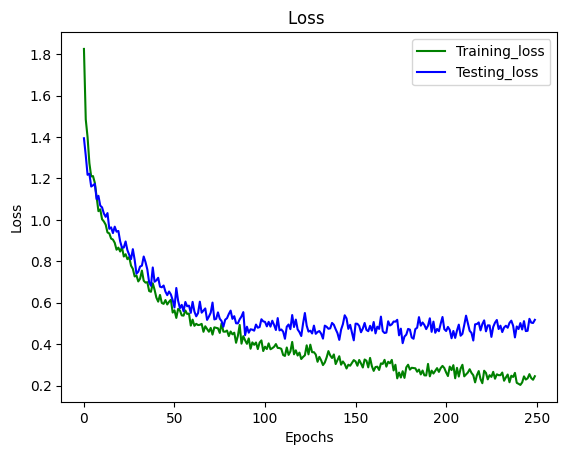

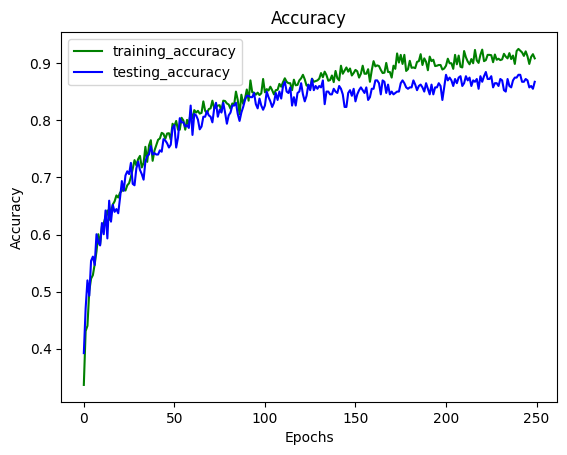

In [ ]:
import matplotlib.pyplot as plt
training_loss = history2.history['loss']
val_loss=history2.history['val_loss']
epochs = range(0,epoch)
plt.plot(epochs, training_loss, 'g', label='Training_loss')
plt.plot(epochs,val_loss, 'b', label='Testing_loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
epochs = range(0,epoch)
plt.plot(epochs, train_accuracy, 'g', label='training_accuracy')
plt.plot(epochs,val_accuracy, 'b', label='testing_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, Flatten, BatchNormalization

# define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history3=model.fit(X_train, Y_train,batch_size=16, epochs=epoch,validation_data=(X_test, Y_test))

model.summary()



Epoch 1/250
203/203 [==============================] - 9s 14ms/step - loss: 1.8830 - accuracy: 0.2219 - val_loss: 1.5843 - val_accuracy: 0.2327
Epoch 2/250
203/203 [==============================] - 2s 9ms/step - loss: 1.6792 - accuracy: 0.2451 - val_loss: 1.5736 - val_accuracy: 0.2698
Epoch 3/250
203/203 [==============================] - 2s 9ms/step - loss: 1.6449 - accuracy: 0.2362 - val_loss: 1.5976 - val_accuracy: 0.2426
Epoch 4/250
203/203 [==============================] - 2s 9ms/step - loss: 1.6056 - accuracy: 0.2655 - val_loss: 1.5667 - val_accuracy: 0.2896
Epoch 5/250
203/203 [==============================] - 2s 9ms/step - loss: 1.5815 - accuracy: 0.2742 - val_loss: 1.5274 - val_accuracy: 0.3267
Epoch 6/250
203/203 [==============================] - 2s 9ms/step - loss: 1.5430 - accuracy: 0.3094 - val_loss: 1.5372 - val_accuracy: 0.3069
Epoch 7/250
203/203 [==============================] - 2s 12ms/step - loss: 1.5188 - accuracy: 0.3147 - val_loss: 1.5380 - val_accuracy: 0.28

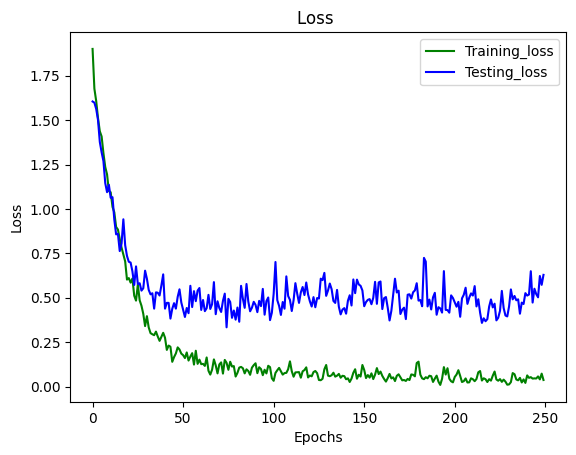

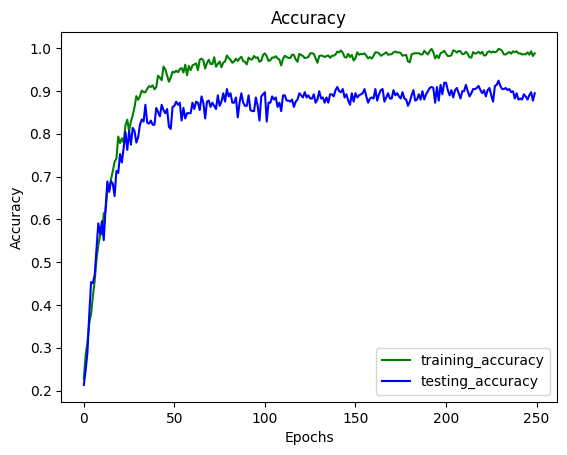

In [ ]:
import matplotlib.pyplot as plt
training_loss = history3.history['loss']
val_loss=history3.history['val_loss']
epochs = range(0,epoch)
plt.plot(epochs, training_loss, 'g', label='Training_loss')
plt.plot(epochs,val_loss, 'b', label='Testing_loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
epochs = range(0,epoch)
plt.plot(epochs, train_accuracy, 'g', label='training_accuracy')
plt.plot(epochs,val_accuracy, 'b', label='testing_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history4=model.fit(X_train, Y_train,batch_size=16, epochs=epoch,validation_data=(X_test, Y_test))
model.summary()


In [ ]:
import matplotlib.pyplot as plt
training_loss = history4.history['loss']
val_loss=history4.history['val_loss']
epochs = range(0,epoch)
plt.plot(epochs, training_loss, 'g', label='Training_loss')
plt.plot(epochs,val_loss, 'b', label='Testing_loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']
epochs = range(0,epoch)
plt.plot(epochs, train_accuracy, 'g', label='training_accuracy')
plt.plot(epochs,val_accuracy, 'b', label='testing_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
history2=model.fit(X_train, Y_train,batch_size=32, epochs=200,validation_data=(X_test, Y_test))

model.summary()


Epoch 1/200
51/51 [==============================] - 3s 17ms/step - loss: 2.1138 - accuracy: 0.2717 - val_loss: 1.5167 - val_accuracy: 0.4010
Epoch 2/200
51/51 [==============================] - 1s 10ms/step - loss: 1.8398 - accuracy: 0.3288 - val_loss: 1.4598 - val_accuracy: 0.3762
Epoch 3/200
51/51 [==============================] - 0s 7ms/step - loss: 1.7019 - accuracy: 0.3424 - val_loss: 1.4380 - val_accuracy: 0.4134
Epoch 4/200
51/51 [==============================] - 0s 6ms/step - loss: 1.6340 - accuracy: 0.3641 - val_loss: 1.4297 - val_accuracy: 0.4134
Epoch 5/200
51/51 [==============================] - 0s 6ms/step - loss: 1.5468 - accuracy: 0.3964 - val_loss: 1.3917 - val_accuracy: 0.4282
Epoch 6/200
51/51 [==============================] - 0s 6ms/step - loss: 1.4845 - accuracy: 0.4100 - val_loss: 1.4245 - val_accuracy: 0.4134
Epoch 7/200
51/51 [==============================] - 0s 5ms/step - loss: 1.4797 - accuracy: 0.4163 - val_loss: 1.4110 - val_accuracy: 0.4307
Epoch 8/200

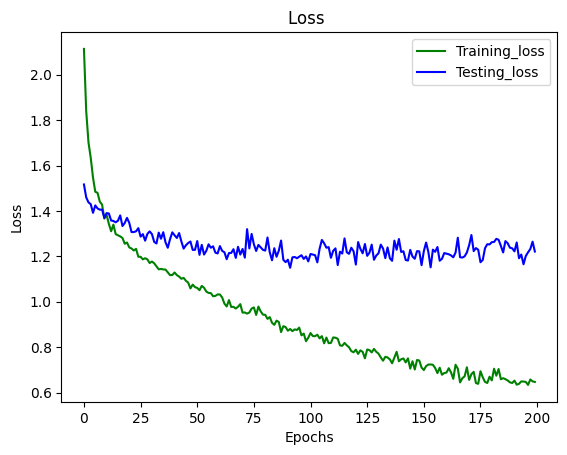

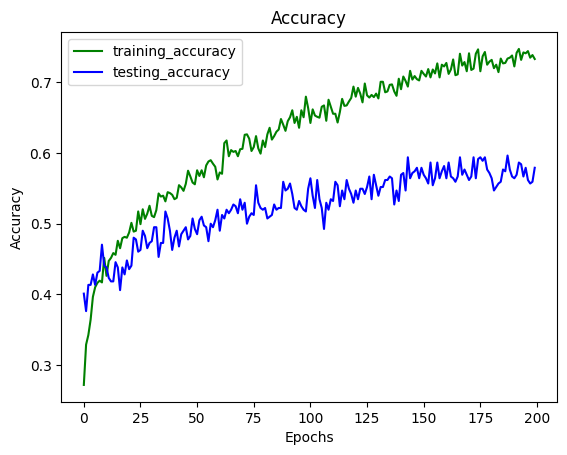

In [ ]:
import matplotlib.pyplot as plt
training_loss = history2.history['loss']
val_loss=history2.history['val_loss']
epochs = range(0,200)
plt.plot(epochs, training_loss, 'g', label='Training_loss')
plt.plot(epochs,val_loss, 'b', label='Testing_loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
epochs = range(0,200)
plt.plot(epochs, train_accuracy, 'g', label='training_accuracy')
plt.plot(epochs,val_accuracy, 'b', label='testing_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
history2=model.fit(X_train, Y_train,batch_size=32, epochs=200,validation_data=(X_test, Y_test))

model.summary()


Epoch 1/200
51/51 [==============================] - 3s 11ms/step - loss: 1.9818 - accuracy: 0.2506 - val_loss: 1.5210 - val_accuracy: 0.3861
Epoch 2/200
51/51 [==============================] - 0s 9ms/step - loss: 1.6887 - accuracy: 0.3313 - val_loss: 1.4743 - val_accuracy: 0.3837
Epoch 3/200
51/51 [==============================] - 1s 10ms/step - loss: 1.5718 - accuracy: 0.3641 - val_loss: 1.4647 - val_accuracy: 0.3837
Epoch 4/200
51/51 [==============================] - 1s 11ms/step - loss: 1.5140 - accuracy: 0.3908 - val_loss: 1.4502 - val_accuracy: 0.3837
Epoch 5/200
51/51 [==============================] - 1s 11ms/step - loss: 1.4612 - accuracy: 0.4138 - val_loss: 1.4661 - val_accuracy: 0.3861
Epoch 6/200
51/51 [==============================] - 0s 10ms/step - loss: 1.4323 - accuracy: 0.4200 - val_loss: 1.4581 - val_accuracy: 0.3787
Epoch 7/200
51/51 [==============================] - 0s 10ms/step - loss: 1.3693 - accuracy: 0.4473 - val_loss: 1.4415 - val_accuracy: 0.3886
Epoch 8

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, Y_train)
X_train=X_resampled
Y_train=y_resampled

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
history2=model.fit(X_train, Y_train,batch_size=32, epochs=200,validation_data=(X_test, Y_test))

model.summary()


Epoch 1/200
51/51 [==============================] - 3s 17ms/step - loss: 1.7320 - accuracy: 0.3412 - val_loss: 1.5439 - val_accuracy: 0.3589
Epoch 2/200
51/51 [==============================] - 1s 11ms/step - loss: 1.5218 - accuracy: 0.3859 - val_loss: 1.5403 - val_accuracy: 0.3416
Epoch 3/200
51/51 [==============================] - 1s 11ms/step - loss: 1.4623 - accuracy: 0.3890 - val_loss: 1.5282 - val_accuracy: 0.3762
Epoch 4/200
51/51 [==============================] - 1s 11ms/step - loss: 1.4645 - accuracy: 0.3890 - val_loss: 1.5100 - val_accuracy: 0.3688
Epoch 5/200
51/51 [==============================] - 1s 12ms/step - loss: 1.4256 - accuracy: 0.4181 - val_loss: 1.4782 - val_accuracy: 0.3936
Epoch 6/200
51/51 [==============================] - 0s 8ms/step - loss: 1.4037 - accuracy: 0.4200 - val_loss: 1.4472 - val_accuracy: 0.3911
Epoch 7/200
51/51 [==============================] - 0s 8ms/step - loss: 1.3797 - accuracy: 0.4367 - val_loss: 1.4285 - val_accuracy: 0.4035
Epoch 8/

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
history2=model.fit(X_train, Y_train,batch_size=16, epochs=200,validation_data=(X_test, Y_test))

model.summary()

Epoch 1/200
101/101 [==============================] - 2s 7ms/step - loss: 1.9608 - accuracy: 0.2512 - val_loss: 1.4713 - val_accuracy: 0.3960
Epoch 2/200
101/101 [==============================] - 0s 5ms/step - loss: 1.7001 - accuracy: 0.3331 - val_loss: 1.4433 - val_accuracy: 0.4208
Epoch 3/200
101/101 [==============================] - 0s 5ms/step - loss: 1.5364 - accuracy: 0.3710 - val_loss: 1.4356 - val_accuracy: 0.4035
Epoch 4/200
101/101 [==============================] - 0s 4ms/step - loss: 1.5282 - accuracy: 0.4001 - val_loss: 1.4196 - val_accuracy: 0.4505
Epoch 5/200
101/101 [==============================] - 1s 5ms/step - loss: 1.4907 - accuracy: 0.4094 - val_loss: 1.4048 - val_accuracy: 0.4134
Epoch 6/200
101/101 [==============================] - 0s 4ms/step - loss: 1.4507 - accuracy: 0.4113 - val_loss: 1.4139 - val_accuracy: 0.4134
Epoch 7/200
101/101 [==============================] - 1s 5ms/step - loss: 1.3976 - accuracy: 0.4435 - val_loss: 1.4111 - val_accuracy: 0.4158

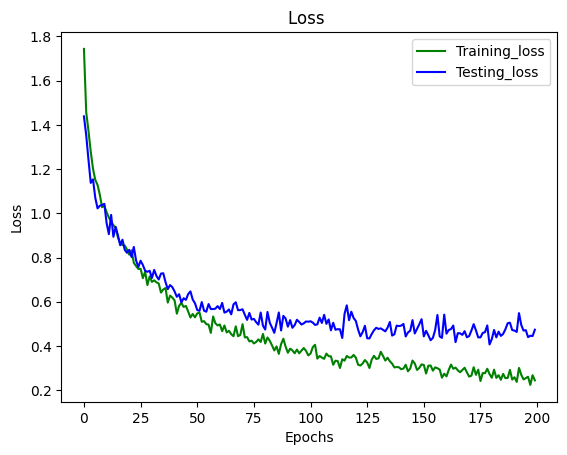

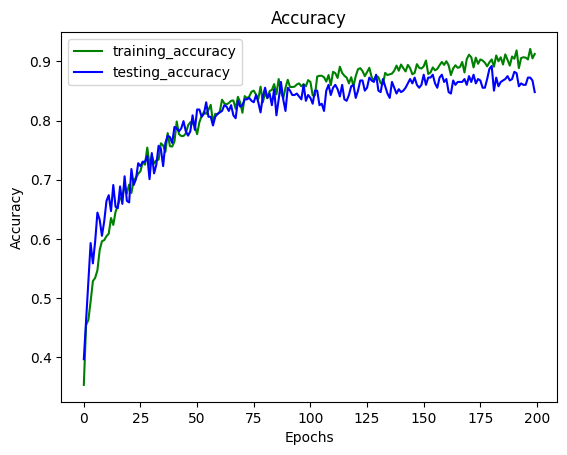

In [ ]:
import matplotlib.pyplot as plt
training_loss = history2.history['loss']
val_loss=history2.history['val_loss']
epochs = range(0,200)
plt.plot(epochs, training_loss, 'g', label='Training_loss')
plt.plot(epochs,val_loss, 'b', label='Testing_loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
epochs = range(0,200)
plt.plot(epochs, train_accuracy, 'g', label='training_accuracy')
plt.plot(epochs,val_accuracy, 'b', label='testing_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Print model summary
history2=model.fit(X_train, Y_train,batch_size=16, epochs=200,validation_data=(X_test, Y_test))

model.summary()

Epoch 1/200
102/102 [==============================] - 2s 6ms/step - loss: 1.7965 - accuracy: 0.3364 - val_loss: 1.4804 - val_accuracy: 0.4681
Epoch 2/200
102/102 [==============================] - 0s 4ms/step - loss: 1.5118 - accuracy: 0.4044 - val_loss: 1.3851 - val_accuracy: 0.4779
Epoch 3/200
102/102 [==============================] - 0s 4ms/step - loss: 1.3938 - accuracy: 0.4442 - val_loss: 1.3165 - val_accuracy: 0.5172
Epoch 4/200
102/102 [==============================] - 0s 4ms/step - loss: 1.3019 - accuracy: 0.4694 - val_loss: 1.2392 - val_accuracy: 0.5245
Epoch 5/200
102/102 [==============================] - 0s 4ms/step - loss: 1.2557 - accuracy: 0.5037 - val_loss: 1.1587 - val_accuracy: 0.5588
Epoch 6/200
102/102 [==============================] - 0s 4ms/step - loss: 1.1900 - accuracy: 0.5233 - val_loss: 1.1327 - val_accuracy: 0.5809
Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 1.1494 - accuracy: 0.5374 - val_loss: 1.0991 - val_accuracy: 0.5907

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Print model summary
history2=model.fit(X_train, Y_train,batch_size=32, epochs=200,validation_data=(X_test, Y_test))

model.summary()

Epoch 1/200
51/51 [==============================] - 1s 8ms/step - loss: 1.9176 - accuracy: 0.2947 - val_loss: 1.5223 - val_accuracy: 0.4167
Epoch 2/200
51/51 [==============================] - 0s 5ms/step - loss: 1.5805 - accuracy: 0.3971 - val_loss: 1.4730 - val_accuracy: 0.4730
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 1.4080 - accuracy: 0.4498 - val_loss: 1.4331 - val_accuracy: 0.4853
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 1.3491 - accuracy: 0.4700 - val_loss: 1.3908 - val_accuracy: 0.5270
Epoch 5/200
51/51 [==============================] - 0s 5ms/step - loss: 1.2894 - accuracy: 0.5049 - val_loss: 1.3224 - val_accuracy: 0.5858
Epoch 6/200
51/51 [==============================] - 0s 5ms/step - loss: 1.1980 - accuracy: 0.5355 - val_loss: 1.2833 - val_accuracy: 0.5613
Epoch 7/200
51/51 [==============================] - 0s 5ms/step - loss: 1.1445 - accuracy: 0.5423 - val_loss: 1.2257 - val_accuracy: 0.5858
Epoch 8/200
5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Print model summary
history2=model.fit(X_train, Y_train,batch_size=16, epochs=200,validation_data=(X_test, Y_test))

model.summary()

Epoch 1/200
102/102 [==============================] - 3s 7ms/step - loss: 1.7315 - accuracy: 0.3333 - val_loss: 1.4353 - val_accuracy: 0.4461
Epoch 2/200
102/102 [==============================] - 0s 4ms/step - loss: 1.4529 - accuracy: 0.4442 - val_loss: 1.3356 - val_accuracy: 0.4779
Epoch 3/200
102/102 [==============================] - 0s 4ms/step - loss: 1.3526 - accuracy: 0.4737 - val_loss: 1.2432 - val_accuracy: 0.5539
Epoch 4/200
102/102 [==============================] - 0s 4ms/step - loss: 1.2613 - accuracy: 0.4890 - val_loss: 1.1726 - val_accuracy: 0.5564
Epoch 5/200
102/102 [==============================] - 0s 4ms/step - loss: 1.1881 - accuracy: 0.5435 - val_loss: 1.0763 - val_accuracy: 0.5907
Epoch 6/200
102/102 [==============================] - 0s 4ms/step - loss: 1.1418 - accuracy: 0.5312 - val_loss: 1.0694 - val_accuracy: 0.5956
Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 1.1086 - accuracy: 0.5515 - val_loss: 1.0447 - val_accuracy: 0.5882

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Print model summary
history2=model.fit(X_train, Y_train,batch_size=16, epochs=200,validation_data=(X_test, Y_test))

model.summary()

Epoch 1/200
102/102 [==============================] - 3s 9ms/step - loss: 1.8024 - accuracy: 0.3493 - val_loss: 1.4085 - val_accuracy: 0.4730
Epoch 2/200
102/102 [==============================] - 1s 6ms/step - loss: 1.4575 - accuracy: 0.4350 - val_loss: 1.3052 - val_accuracy: 0.4975
Epoch 3/200
102/102 [==============================] - 1s 6ms/step - loss: 1.3854 - accuracy: 0.4559 - val_loss: 1.2133 - val_accuracy: 0.5343
Epoch 4/200
102/102 [==============================] - 1s 5ms/step - loss: 1.2990 - accuracy: 0.4963 - val_loss: 1.1354 - val_accuracy: 0.5882
Epoch 5/200
102/102 [==============================] - 1s 6ms/step - loss: 1.2200 - accuracy: 0.5380 - val_loss: 1.0979 - val_accuracy: 0.5907
Epoch 6/200
102/102 [==============================] - 0s 4ms/step - loss: 1.1163 - accuracy: 0.5790 - val_loss: 1.0949 - val_accuracy: 0.5784
Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 1.0969 - accuracy: 0.5735 - val_loss: 1.0151 - val_accuracy: 0.6446

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
history2=model.fit(X_train, Y_train,batch_size=16, epochs=50,validation_data=(X_test, Y_test))

model.summary()

In [ ]:
# Reshape the input data for use in an RNN
x_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
x_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
import numpy as np
# RNN model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your RNN model
history=model.fit(X_train, Y_train,epochs=50,batch_size=16,validation_data=(X_test, Y_test))


Epoch 1/50
102/102 [==============================] - 9s 67ms/step - loss: 1.4970 - accuracy: 0.3444 - val_loss: 1.4565 - val_accuracy: 0.3578
Epoch 2/50
102/102 [==============================] - 5s 46ms/step - loss: 1.4104 - accuracy: 0.4148 - val_loss: 1.3760 - val_accuracy: 0.4167
Epoch 3/50
102/102 [==============================] - 5s 48ms/step - loss: 1.3393 - accuracy: 0.4375 - val_loss: 1.3313 - val_accuracy: 0.4608
Epoch 4/50
102/102 [==============================] - 6s 63ms/step - loss: 1.2673 - accuracy: 0.4853 - val_loss: 1.2512 - val_accuracy: 0.5172
Epoch 5/50
102/102 [==============================] - 5s 47ms/step - loss: 1.1835 - accuracy: 0.5282 - val_loss: 1.2556 - val_accuracy: 0.5245
Epoch 6/50
102/102 [==============================] - 7s 72ms/step - loss: 1.1100 - accuracy: 0.5748 - val_loss: 1.1408 - val_accuracy: 0.5637
Epoch 7/50
102/102 [==============================] - 5s 51ms/step - loss: 1.0422 - accuracy: 0.5876 - val_loss: 1.1014 - val_accuracy: 0.5686

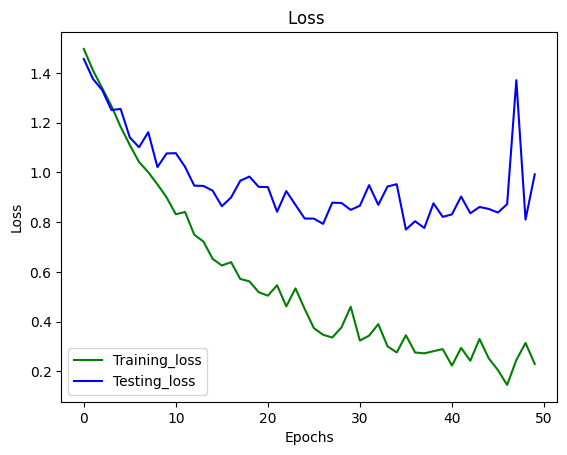

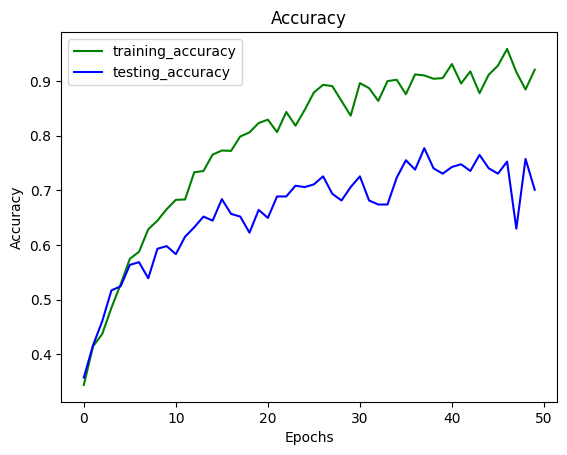

In [ ]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, training_loss, 'g', label='Training_loss')
plt.plot(epochs,val_loss, 'b', label='Testing_loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, train_accuracy, 'g', label='training_accuracy')
plt.plot(epochs,val_accuracy, 'b', label='testing_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#epoch 250
import numpy as np
# RNN model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your RNN model
history=model.fit(X_train, Y_train,epochs=250,batch_size=16,validation_data=(X_test, Y_test))


Epoch 1/250
101/101 [==============================] - 16s 91ms/step - loss: 1.5435 - accuracy: 0.3493 - val_loss: 1.4566 - val_accuracy: 0.4480
Epoch 2/250
101/101 [==============================] - 11s 106ms/step - loss: 1.5039 - accuracy: 0.3865 - val_loss: 1.4353 - val_accuracy: 0.4579
Epoch 3/250
101/101 [==============================] - 15s 148ms/step - loss: 1.5119 - accuracy: 0.3877 - val_loss: 1.4409 - val_accuracy: 0.4554
Epoch 4/250
101/101 [==============================] - 13s 125ms/step - loss: 1.4984 - accuracy: 0.3871 - val_loss: 1.4573 - val_accuracy: 0.4109
Epoch 5/250
101/101 [==============================] - 7s 68ms/step - loss: 1.4871 - accuracy: 0.3859 - val_loss: 1.4336 - val_accuracy: 0.4554
Epoch 6/250
101/101 [==============================] - 9s 89ms/step - loss: 1.4801 - accuracy: 0.3890 - val_loss: 1.3878 - val_accuracy: 0.4851
Epoch 7/250
101/101 [==============================] - 8s 76ms/step - loss: 1.4816 - accuracy: 0.3964 - val_loss: 1.4209 - val_ac

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, training_loss, 'g', label='Training_loss')
plt.plot(epochs,val_loss, 'b', label='Testing_loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, train_accuracy, 'g', label='training_accuracy')
plt.plot(epochs,val_accuracy, 'b', label='testing_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
# RNN model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your RNN model
history=model.fit(X_train, Y_train,epochs=50,batch_size=32,validation_data=(X_test, Y_test))


Epoch 1/50
51/51 [==============================] - 5s 55ms/step - loss: 1.5316 - accuracy: 0.3143 - val_loss: 1.4399 - val_accuracy: 0.3750
Epoch 2/50
51/51 [==============================] - 2s 49ms/step - loss: 1.4280 - accuracy: 0.3897 - val_loss: 1.4264 - val_accuracy: 0.4020
Epoch 3/50
51/51 [==============================] - 3s 64ms/step - loss: 1.3639 - accuracy: 0.4369 - val_loss: 1.3416 - val_accuracy: 0.4755
Epoch 4/50
51/51 [==============================] - 3s 59ms/step - loss: 1.3202 - accuracy: 0.4712 - val_loss: 1.3341 - val_accuracy: 0.4828
Epoch 5/50
51/51 [==============================] - 2s 48ms/step - loss: 1.2539 - accuracy: 0.4982 - val_loss: 1.2344 - val_accuracy: 0.5294
Epoch 6/50
51/51 [==============================] - 2s 47ms/step - loss: 1.1578 - accuracy: 0.5472 - val_loss: 1.2555 - val_accuracy: 0.5049
Epoch 7/50
51/51 [==============================] - 2s 49ms/step - loss: 1.1094 - accuracy: 0.5827 - val_loss: 1.1822 - val_accuracy: 0.5172
Epoch 8/50
51

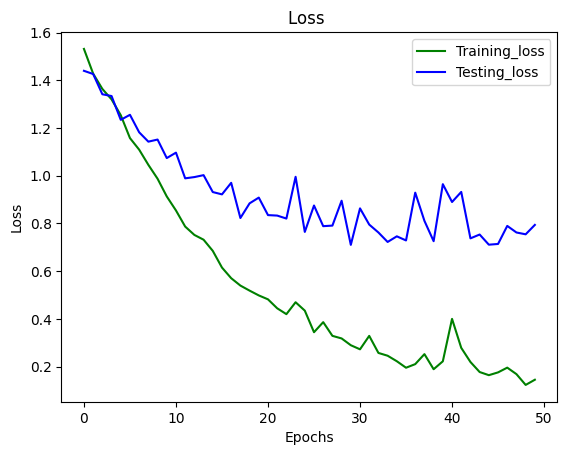

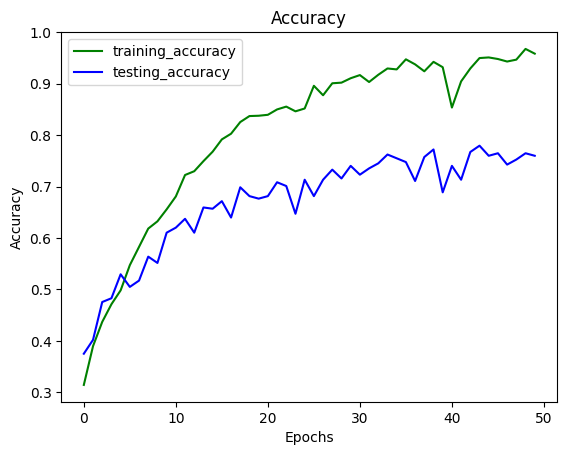

In [ ]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, training_loss, 'g', label='Training_loss')
plt.plot(epochs,val_loss, 'b', label='Testing_loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, train_accuracy, 'g', label='training_accuracy')
plt.plot(epochs,val_accuracy, 'b', label='testing_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
# RNN model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train your RNN model
history=model.fit(X_train, Y_train,epochs=50,batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/50
51/51 [==============================] - 6s 85ms/step - loss: 1.6056 - accuracy: 0.2414 - val_loss: 1.5520 - val_accuracy: 0.3039
Epoch 2/50
51/51 [==============================] - 2s 49ms/step - loss: 1.5346 - accuracy: 0.3217 - val_loss: 1.5093 - val_accuracy: 0.3627
Epoch 3/50
51/51 [==============================] - 2s 49ms/step - loss: 1.4849 - accuracy: 0.3615 - val_loss: 1.4661 - val_accuracy: 0.3824
Epoch 4/50
51/51 [==============================] - 2s 48ms/step - loss: 1.4523 - accuracy: 0.3915 - val_loss: 1.4455 - val_accuracy: 0.3750
Epoch 5/50
51/51 [==============================] - 3s 56ms/step - loss: 1.4224 - accuracy: 0.4032 - val_loss: 1.4103 - val_accuracy: 0.4289
Epoch 6/50
51/51 [==============================] - 4s 68ms/step - loss: 1.4016 - accuracy: 0.4032 - val_loss: 1.3969 - val_accuracy: 0.4020
Epoch 7/50
51/51 [==============================] - 2s 48ms/step - loss: 1.3741 - accuracy: 0.4173 - val_loss: 1.3621 - val_accuracy: 0.4632
Epoch 8/50
51

In [ ]:
import numpy as np
# RNN model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train your RNN model
history=model.fit(X_train, Y_train,epochs=50,batch_size=16,validation_data=(X_test, Y_test))

Epoch 1/50
102/102 [==============================] - 8s 65ms/step - loss: 1.5484 - accuracy: 0.3100 - val_loss: 1.4487 - val_accuracy: 0.3799
Epoch 2/50
102/102 [==============================] - 5s 46ms/step - loss: 1.4391 - accuracy: 0.3811 - val_loss: 1.3766 - val_accuracy: 0.4289
Epoch 3/50
102/102 [==============================] - 6s 61ms/step - loss: 1.3731 - accuracy: 0.4148 - val_loss: 1.3411 - val_accuracy: 0.4681
Epoch 4/50
102/102 [==============================] - 5s 48ms/step - loss: 1.3049 - accuracy: 0.4755 - val_loss: 1.2789 - val_accuracy: 0.5196
Epoch 5/50
102/102 [==============================] - 5s 47ms/step - loss: 1.2628 - accuracy: 0.4969 - val_loss: 1.2684 - val_accuracy: 0.5074
Epoch 6/50
102/102 [==============================] - 6s 61ms/step - loss: 1.2199 - accuracy: 0.5006 - val_loss: 1.1957 - val_accuracy: 0.5515
Epoch 7/50
102/102 [==============================] - 5s 47ms/step - loss: 1.1865 - accuracy: 0.5202 - val_loss: 1.3782 - val_accuracy: 0.4363

In [ ]:
import numpy as np
# RNN model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Train your RNN model
history=model.fit(X_train, Y_train,epochs=50,batch_size=16,validation_data=(X_test, Y_test))

Epoch 1/50
102/102 [==============================] - 8s 50ms/step - loss: 1.5172 - accuracy: 0.3431 - val_loss: 1.4624 - val_accuracy: 0.3652
Epoch 2/50
102/102 [==============================] - 6s 55ms/step - loss: 1.4113 - accuracy: 0.3971 - val_loss: 1.3416 - val_accuracy: 0.4412
Epoch 3/50
102/102 [==============================] - 6s 54ms/step - loss: 1.3417 - accuracy: 0.4350 - val_loss: 1.4037 - val_accuracy: 0.4387
Epoch 4/50
102/102 [==============================] - 5s 47ms/step - loss: 1.2755 - accuracy: 0.4884 - val_loss: 1.1995 - val_accuracy: 0.5368
Epoch 5/50
102/102 [==============================] - 6s 62ms/step - loss: 1.2048 - accuracy: 0.5098 - val_loss: 1.2444 - val_accuracy: 0.5098
Epoch 6/50
102/102 [==============================] - 5s 46ms/step - loss: 1.1555 - accuracy: 0.5349 - val_loss: 1.1364 - val_accuracy: 0.5662
Epoch 7/50
102/102 [==============================] - 5s 54ms/step - loss: 1.0735 - accuracy: 0.5711 - val_loss: 1.1874 - val_accuracy: 0.5515

KeyboardInterrupt: ignored

In [ ]:
# LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Reshape the input data for use in an RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define your LSTM model
model = Sequential()
model.add(LSTM(64,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))

# Compile your LSTM model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train your LSTM model
history=model.fit(X_train, Y_train, batch_size=16,epochs=50,validation_data=(X_test, Y_test))

Epoch 1/50
102/102 [==============================] - 8s 21ms/step - loss: 1.6063 - accuracy: 0.2347 - val_loss: 1.6120 - val_accuracy: 0.1961
Epoch 2/50
102/102 [==============================] - 1s 11ms/step - loss: 1.6037 - accuracy: 0.2298 - val_loss: 1.6129 - val_accuracy: 0.1789
Epoch 3/50
102/102 [==============================] - 1s 8ms/step - loss: 1.6013 - accuracy: 0.2488 - val_loss: 1.6123 - val_accuracy: 0.1936
Epoch 4/50
102/102 [==============================] - 1s 7ms/step - loss: 1.5987 - accuracy: 0.2567 - val_loss: 1.6111 - val_accuracy: 0.1912
Epoch 5/50
102/102 [==============================] - 1s 7ms/step - loss: 1.5964 - accuracy: 0.2561 - val_loss: 1.6093 - val_accuracy: 0.1912
Epoch 6/50
102/102 [==============================] - 1s 8ms/step - loss: 1.5932 - accuracy: 0.2610 - val_loss: 1.6082 - val_accuracy: 0.1985
Epoch 7/50
102/102 [==============================] - 1s 9ms/step - loss: 1.5900 - accuracy: 0.2696 - val_loss: 1.6053 - val_accuracy: 0.2132
Epoc

In [ ]:
# LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Reshape the input data for use in an RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define your LSTM model
model = Sequential()
model.add(LSTM(64,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))

# Compile your LSTM model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train your LSTM model
history=model.fit(X_train, Y_train, batch_size=32,epochs=50,validation_data=(X_test, Y_test))

Epoch 1/50
51/51 [==============================] - 7s 23ms/step - loss: 1.5826 - accuracy: 0.2555 - val_loss: 1.5987 - val_accuracy: 0.2500
Epoch 2/50
51/51 [==============================] - 0s 8ms/step - loss: 1.5482 - accuracy: 0.2947 - val_loss: 1.5822 - val_accuracy: 0.2696
Epoch 3/50
51/51 [==============================] - 0s 8ms/step - loss: 1.5314 - accuracy: 0.2990 - val_loss: 1.5668 - val_accuracy: 0.2794
Epoch 4/50
51/51 [==============================] - 0s 8ms/step - loss: 1.5008 - accuracy: 0.3254 - val_loss: 1.5473 - val_accuracy: 0.3186
Epoch 5/50
51/51 [==============================] - 0s 8ms/step - loss: 1.4853 - accuracy: 0.3364 - val_loss: 1.4861 - val_accuracy: 0.3873
Epoch 6/50
51/51 [==============================] - 0s 8ms/step - loss: 1.4410 - accuracy: 0.3964 - val_loss: 1.4618 - val_accuracy: 0.3848
Epoch 7/50
51/51 [==============================] - 0s 8ms/step - loss: 1.3987 - accuracy: 0.4301 - val_loss: 1.4703 - val_accuracy: 0.3971
Epoch 8/50
51/51 [=

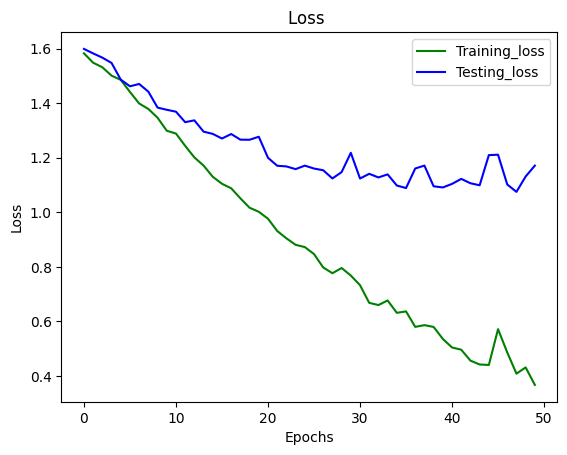

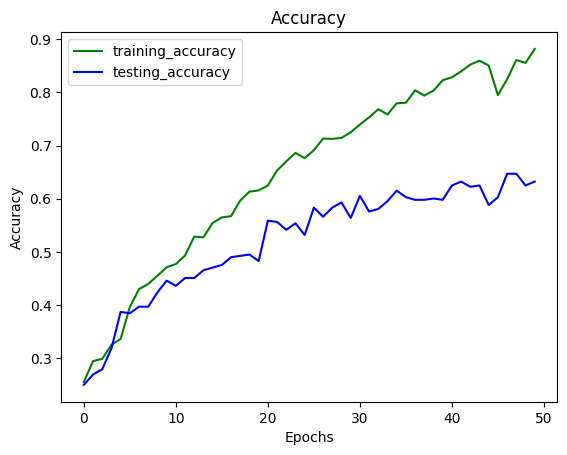

In [ ]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, training_loss, 'g', label='Training_loss')
plt.plot(epochs,val_loss, 'b', label='Testing_loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, train_accuracy, 'g', label='training_accuracy')
plt.plot(epochs,val_accuracy, 'b', label='testing_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
#train data reshape
# resize mfcc(X_train)
from skimage.transform import resize

# Assume mfcc_features is your input array of shape (n_samples, n_mfcc)
#new_shape = (224, 224)  # or any other desired shape

resized_mfcc = []
for i in range(len(X_train)):
    resized = resize(X_train[i], (224,224,3))
    resized_mfcc.append(resized)

X_train = np.array(resized_mfcc)
#test data reshape
from skimage.transform import resize

# Assume mfcc_features is your input array of shape (n_samples, n_mfcc)
new_shape = (224, 224)  # or any other desired shape

resized_mfcc = []
for i in range(len(X_test)):
    resized = resize(X_test[i], (224,224,3))
    resized_mfcc.append(resized)

X_test = np.array(resized_mfcc)

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16

# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model based on VGG16
model = Sequential()
for layer in vgg_model.layers:
    model.add(layer)
# Add new dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
51/51 [==============================] - 3724s 73s/step - loss: 1.9497 - accuracy: 0.2034
Epoch 2/10
48/51 [===========================>..] - ETA: 3:34 - loss: 1.6103 - accuracy: 0.2018